## Importing Necessary Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Setting up Directories relative to the working directory


In [7]:
base_dir = "../"
data_dir = r"E:\Coding\Machine Learning\Projects by Dataset\Data Store\Fish Data\\"
saved_models = base_dir + "Saved_Models/"

train_dir = data_dir + "Train Dataset"
test_dir = data_dir + "Test Dataset"
validation_dir = data_dir + "Validation Dataset"

##  Creating Generators to generate images from directories along with classes and used Data Augmentation to avoid 'Overfitting'.
    -> Data Augmentation Techniques help to avoid overfitting as the focus of the image gets relocated at different places, it's size and angle gets changed. So, the model then gets a better understanding of the object/objects which is/are center of attention.

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=50,                      # Images get randomly rotate to +/- 50 degrees.
    width_shift_range=0.2,                  # Images get shifted in left/right direction. 
    height_shift_range=0.2,                 # Images get shifted in upward/downward direction.

    # Applies shear to image(seems image was taken from a different angle)
    shear_range=20,

    zoom_range=0.2,                         # Clips a zoomed in image
    horizontal_flip=True,                   # Flips the image horizontally
    vertical_flip=True,                     # Flips the image vertically
    rescale=1./255                          # Normalize input array to range(0, 1)
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (512, 512),               # Specifies input dimension of pixels of image
    batch_size=25,                          # The number of images supplied to model in each batch
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(512, 512),
    batch_size=25,
    class_mode= 'categorical'
)

Found 8100 images belonging to 9 classes.
Found 900 images belonging to 9 classes.


In [27]:
# Image Generators are iterators containing tuples(image, labels) 1 batch at a time
batch = next(validation_generator)

#Names of different classes of fishes are available in class_indices as dictionary
class_dict = {value : key for key, value in train_generator.class_indices.items()}
print(class_dict.values())

dict_values(['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'])


## Visualization of some random images along with their labels

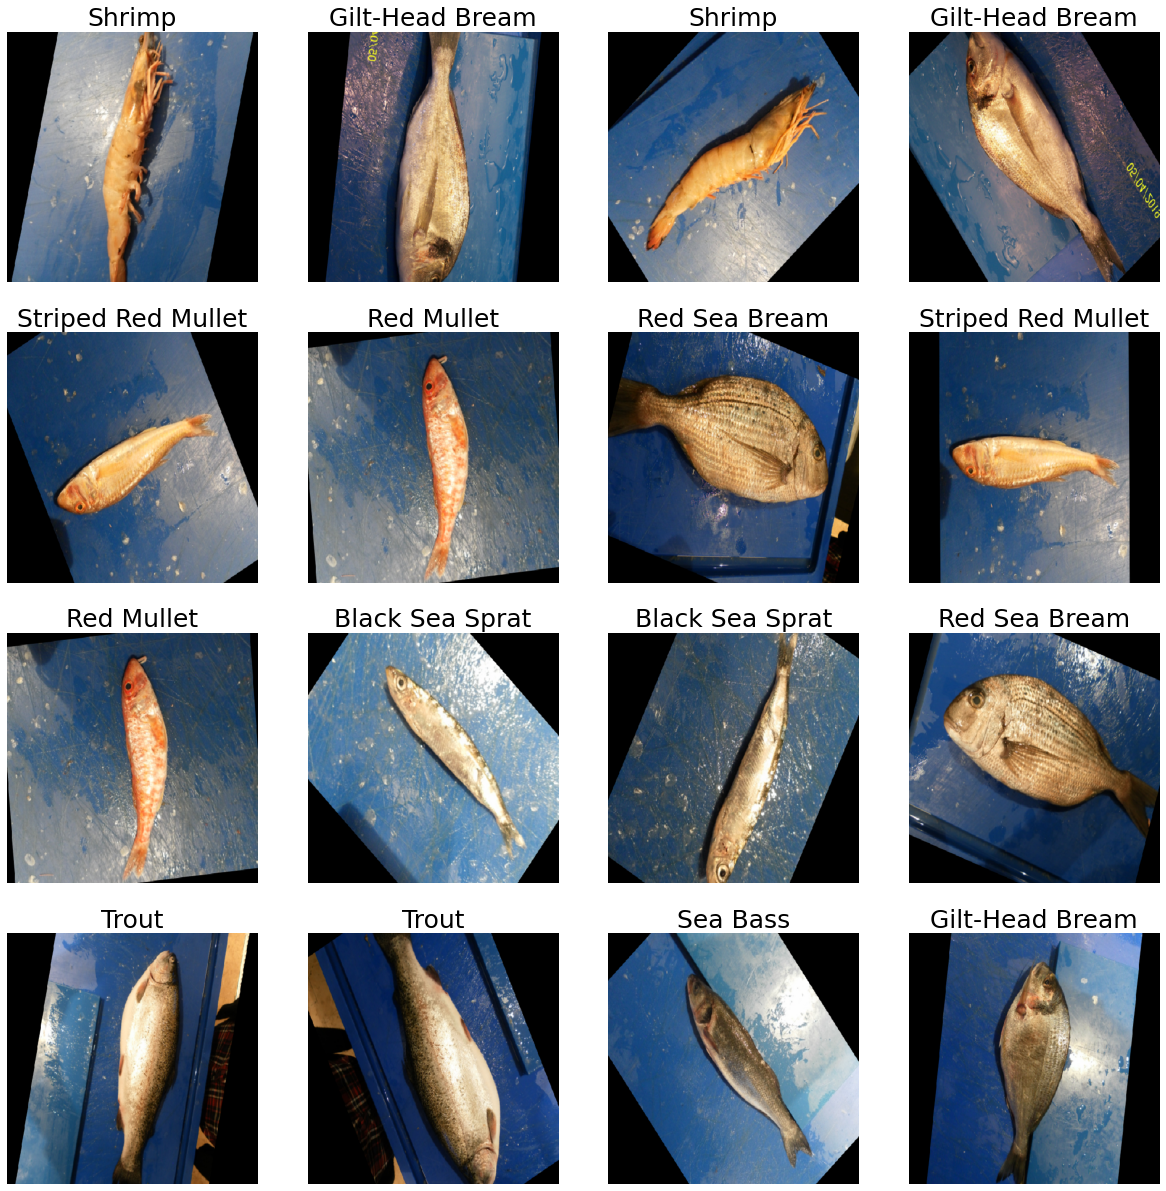

In [28]:
fig, axes = plt.subplots(4, 4, figsize = (20, 20))
axarr = list(axes)
for i in range(4):
    for j in range(4):
        image = batch[0][4 * i + j]

        # Labels of images are one-hot encoded arrays. So, we use argmax method to get the column for which an image is labelled as "1".
        label_ = class_dict[np.argmax(batch[1][4 * i + j])]
        axes[i, j].imshow(image)
        axes[i, j].set_title(label_, fontsize = 25)
        axes[i, j].axis('off')

plt.subplots_adjust(
    left=0.1,
    bottom = 0.1,
    right=0.9,
    top = 0.9,
    wspace=0.2,
    hspace = 0.2    
)

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models
import keras

## Creation of Model using Conv2D, MaxPool2D, Flatten and Dense Layers

In [51]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape = (512, 512, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

    #Flatten Layer used to Flatten the 3-Dimensional Layer to 1-D for applying Dense Layers
    tf.keras.layers.Flatten(),


    # Fully Connected Layers
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')

])

# Tuning of Optimizer
# Learning Rate decay is very helpful to start off with a high learning rate and bring it 
# down such that training of model is smooth
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_rate=0.8,
    decay_steps=628,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compiling The Model
model.compile(
    optimizer = optimizer,
    loss=tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

In [52]:
from datetime import datetime

start_time = datetime.now()
history = model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=324,
    epochs = 14,
    validation_steps=36
)
end_time = datetime.now()
elapsed_time = (end_time - start_time)

C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/14
324/324 [==============================] - 978s 3s/step - loss: 1.9776 - accuracy: 0.2058 - val_loss: 1.6560 - val_accuracy: 0.2922
Epoch 2/14
324/324 [==============================] - 1049s 3s/step - loss: 1.2072 - accuracy: 0.5380 - val_loss: 1.1930 - val_accuracy: 0.5344
Epoch 3/14
324/324 [==============================] - 1059s 3s/step - loss: 0.9537 - accuracy: 0.6267 - val_loss: 1.0896 - val_accuracy: 0.5556
Epoch 4/14
324/324 [==============================] - 1039s 3s/step - loss: 0.8059 - accuracy: 0.6847 - val_loss: 0.8290 - val_accuracy: 0.7133
Epoch 5/14
324/324 [==============================] - 1037s 3s/step - loss: 0.6817 - accuracy: 0.7404 - val_loss: 0.7217 - val_accuracy: 0.7578
Epoch 6/14
324/324 [==============================] - 1032s 3s/step - loss: 0.6212 - accuracy: 0.7589 - val_loss: 0.8835 - val_accuracy: 0.6878
Epoch 7/14
324/324 [==============================] - 1073s 3s/step - loss: 0.5369 - accuracy: 0.7954 - val_loss: 0.7767 - val_accuracy: 

In [53]:
# Time taken for the model to fit
print("Total time elapsed to train the model is:", elapsed_time)

Total time elapsed to train the model is: 4:02:27.926023


# Plotting the history of progress of model with respective epochs.

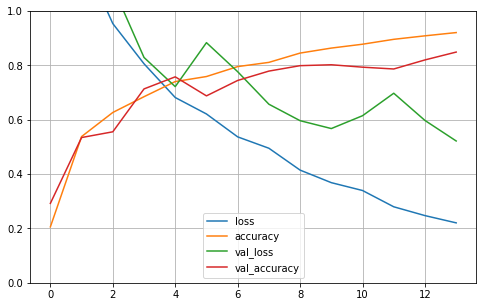

In [54]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### As visible, accuracy is still going up. So, training for a few more epochs or manipulating the learning rate would help effectively to get the best possible results on test set.

## Saved the model along with weights and biases to the designated directory and then deleted the model.
    -> Then we reload the model to evaluate

In [55]:
model.save((saved_models + 'First_try.tf'))
del model

INFO:tensorflow:Assets written to: ../Saved_Models/First_try.tf\assets


In [56]:
# Loading the model and viewing the summary.
model = tf.keras.models.load_model((saved_models + 'First_try.tf'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 510, 510, 8)       224       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 255, 255, 8)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 253, 253, 32)      2336      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 60, 60, 64)       

## Plotting the model using Kers.utils.plot_model and then saving it to saved models folder to help get a glance of model without having the need to open any Notebook.

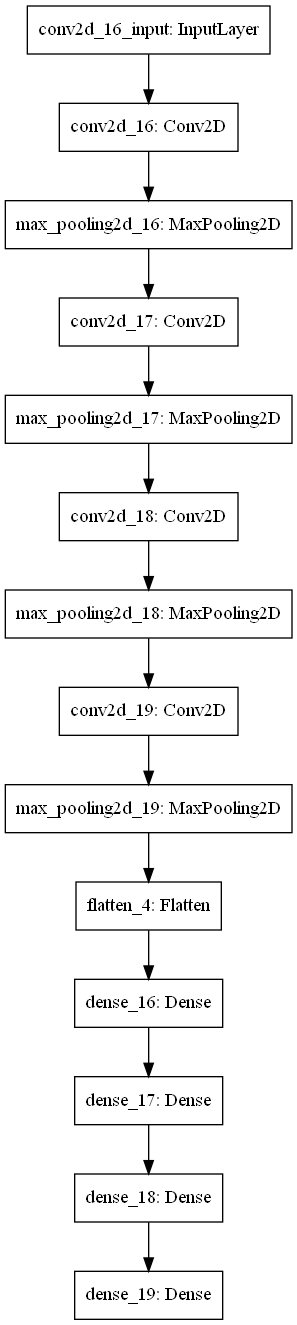

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = (saved_models + 'First_try.png'))

In [58]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(512, 512),
    batch_size=50,
    shuffle=False
)

Found 430 images belonging to 9 classes.


In [59]:
predicted_ = model.predict(test_generator)
filenames_ = test_generator.filenames

Predicted_classes = np.argmax(predicted_, axis = 1)
Actual_classes = np.array(test_generator.classes)

In [60]:
Acc_Score = accuracy_score(Actual_classes, Predicted_classes)
print("Accuracy Score:", Acc_Score)

Accuracy Score: 0.6325581395348837


In [61]:
confusion_mat = pd.DataFrame(confusion_matrix(Actual_classes, Predicted_classes))
confusion_mat['True Values'] = class_dict.values()
confusion_mat = confusion_mat.set_index('True Values')
confusion_mat = confusion_mat.rename(
    columns = {
        value:key for key, value in (train_generator.class_indices).items()
    }
)
confusion_mat

,Black Sea Sprat,Gilt-Head Bream,Hourse Mackerel,Red Mullet,Red Sea Bream,Sea Bass,Shrimp,Striped Red Mullet,Trout
True Values,,,,,,,,,
Black Sea Sprat,47,0,0,0,0,1,0,2,0
Gilt-Head Bream,0,29,0,0,0,16,0,3,2
Hourse Mackerel,5,3,3,0,0,32,0,7,0
Red Mullet,0,0,0,50,0,0,0,0,0
Red Sea Bream,1,10,0,1,4,27,0,0,7
Sea Bass,1,1,0,10,0,35,0,3,0
Shrimp,0,0,0,0,0,0,32,18,0
Striped Red Mullet,0,0,0,3,0,1,0,46,0
Trout,0,2,0,0,0,2,0,0,26


# Conclusions
    -> The errors in predictions were concentrated rather than being random.
        -> A number of "Striped Red Mullets" got predicted as "Red Mullet" or "Shrimp" implying that the three have similar body-shape.
        -> Gilt-Head Bream got predicted as Red Sea Bream as many as 9 times.
        -> Hourse Mackerel got predicted as Black Sea Sprat 5 times.
    -> Accuracy of model is still going up implying that training for a few more epochs would give even better results.

In [62]:
Result = pd.DataFrame({
    'File': filenames_,
    'Actual Classes': Actual_classes,
    'Predicted Classes': Predicted_classes    
})
Result['Predicted Class'] = Result['Predicted Classes'].apply(lambda x: class_dict[x])
Result['Actual Class'] = Result['Actual Classes'].apply(lambda x: class_dict[x])

Result.drop(columns = ['Predicted Classes', 'Actual Classes'], inplace=True)
Result.sample(frac=0.025, random_state=0)

,File,Predicted Class,Actual Class
154,Red Mullet\00005.png,Red Mullet,Red Mullet
264,Sea Bass\22.JPG,Sea Bass,Sea Bass
54,Gilt Head Bream\13.JPG,Sea Bass,Gilt-Head Bream
199,Red Mullet\00050.png,Red Mullet,Red Mullet
10,Black Sea Sprat\00011.png,Black Sea Sprat,Black Sea Sprat
153,Red Mullet\00004.png,Red Mullet,Red Mullet
348,Shrimp\00049.png,Striped Red Mullet,Shrimp
102,Horse Mackerel\00003.png,Sea Bass,Hourse Mackerel
107,Horse Mackerel\00008.png,Striped Red Mullet,Hourse Mackerel
157,Red Mullet\00008.png,Red Mullet,Red Mullet
